# Projeto 2

In [749]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [750]:
pd.__version__

'2.2.2'

In [751]:
df = pd.read_csv('../../data/Proj_2_dataset.csv')

In [752]:
df.head(5)

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [753]:
df.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [754]:
df['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [755]:
df.isna().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [756]:
df.isnull().sum()


ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [757]:
df.duplicated().sum()


0

- Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [758]:
df.Categoria.value_counts()


Categoria
Office Supplies    5851
Furniture          2055
Technology         1794
Name: count, dtype: int64

In [759]:
df2 = df[['Cidade', 'Categoria', 'Valor_Venda']].copy()
df2

,Cidade,Categoria,Valor_Venda
0,Henderson,Furniture,261.9600
1,Henderson,Furniture,731.9400
2,Los Angeles,Office Supplies,14.6200
3,Fort Lauderdale,Furniture,957.5775
4,Fort Lauderdale,Office Supplies,22.3680
...,...,...,...
9695,Inglewood,Office Supplies,22.8300
9696,Inglewood,Office Supplies,54.3200
9697,Inglewood,Technology,196.7760
9698,San Luis Obispo,Office Supplies,3.6200


In [760]:
df3 = df2.loc[df2['Categoria'].isin(['Office Supplies'])].reset_index()
df3

,index,Cidade,Categoria,Valor_Venda
0,2,Los Angeles,Office Supplies,14.620
1,4,Fort Lauderdale,Office Supplies,22.368
2,6,Los Angeles,Office Supplies,7.280
3,8,Los Angeles,Office Supplies,18.504
4,9,Los Angeles,Office Supplies,114.900
...,...,...,...,...
5846,9693,Detroit,Office Supplies,491.550
5847,9695,Inglewood,Office Supplies,22.830
5848,9696,Inglewood,Office Supplies,54.320
5849,9698,San Luis Obispo,Office Supplies,3.620


In [761]:
df_max = df3[['Cidade', 'Valor_Venda']].groupby(['Cidade'])['Valor_Venda'].sum().idxmax()
df_max

'New York City'

- Qual o Total de Vendas Por Data do Pedido? Demonstre o resultado através de um gráfico de barras.

In [762]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [763]:
df2 = df.copy()
df2['Data_Pedido'] = pd.to_datetime(df2['Data_Pedido'], format='%d/%m/%Y')
df2


,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680
...,...,...,...,...,...,...,...,...,...,...,...
9695,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.8300
9696,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.3200
9697,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.7760
9698,CA-2017-105291,2017-10-30,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.6200


In [764]:
df2 = df2.groupby('Data_Pedido')['Valor_Venda'].sum()
df2.head()

Data_Pedido
2015-01-03      16.448
2015-01-04     288.060
2015-01-05      19.536
2015-01-06    4407.100
2015-01-07      87.158
Name: Valor_Venda, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

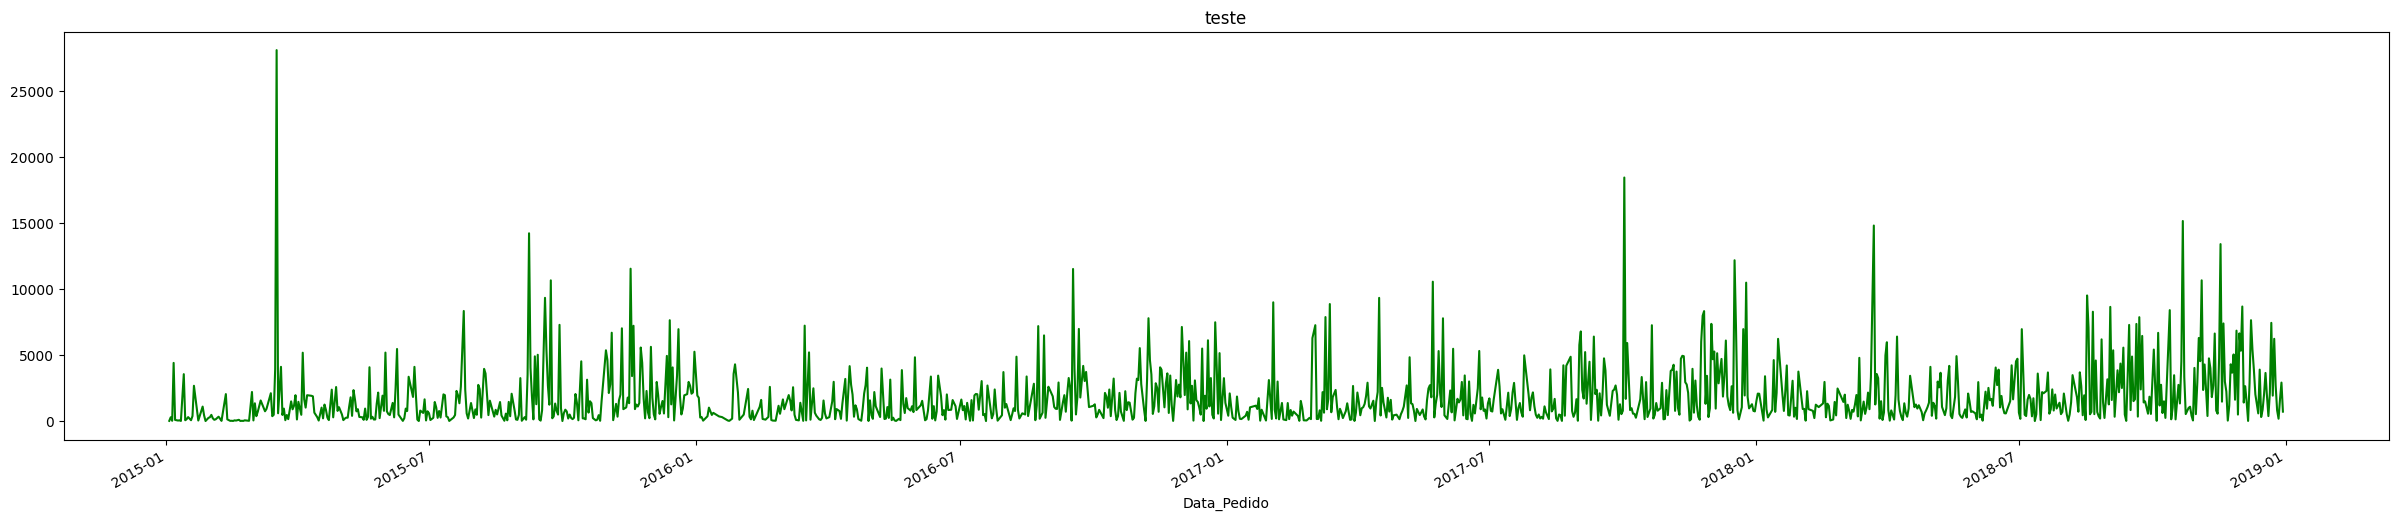

In [765]:
plt.figure(figsize= (30, 6))
df2.plot(x = 'Data_Pedido', y= 'Valor_Venda', color = 'green')
plt.title('teste')
plt.show

- Qual o Total de Vendas por Estado? Demonstre o resultado através de um gráfico de barras.

In [766]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [767]:
df2 = df[['Estado', 'Valor_Venda']].groupby('Estado').sum().reset_index()
df2.head()

,Estado,Valor_Venda
0,Alabama,19510.6400
1,Arizona,35272.6570
2,Arkansas,11673.8300
3,California,442927.0975
4,Colorado,31841.5980


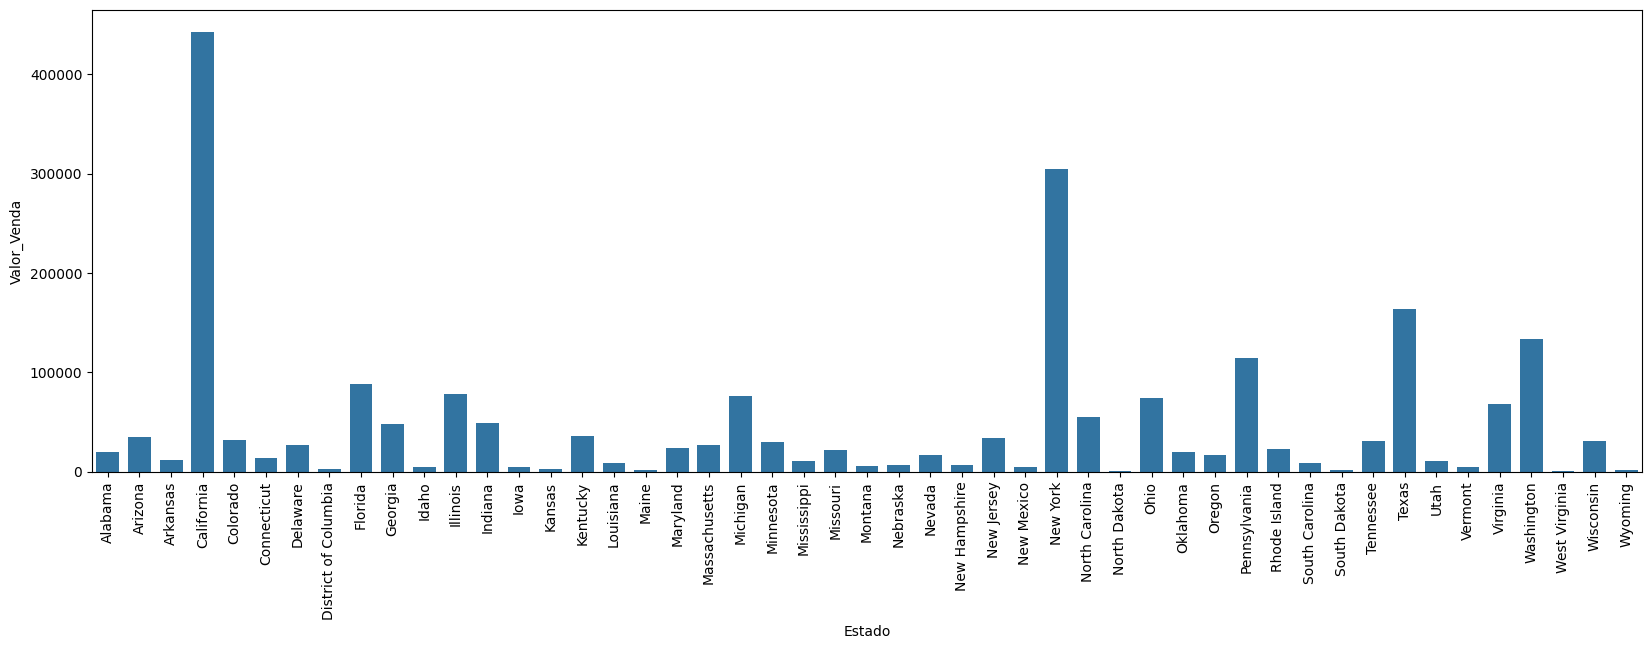

In [768]:
plt.figure(figsize= (20, 6))
sns.barplot(data= df2, x = 'Estado', y = 'Valor_Venda', gap = 0.1)
plt.xticks(rotation = 90)
plt.show()

- Quais São as 10 Cidades com Maior Total de Vendas? Demonstre o resultado através de um gráfico de barras.

In [769]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [770]:
df2 = df[['Cidade', 'Valor_Venda']].copy().groupby('Cidade').sum().sort_values('Valor_Venda', ascending= False).reset_index()
df2.head(10)

,Cidade,Valor_Venda
0,New York City,251749.2190
1,Los Angeles,171654.6330
2,Seattle,114725.4780
3,San Francisco,107489.9520
4,Philadelphia,107197.8030
5,Houston,61590.1868
6,San Diego,47458.3790
7,Chicago,46974.3430
8,Jacksonville,44713.1830
9,Detroit,42446.9440


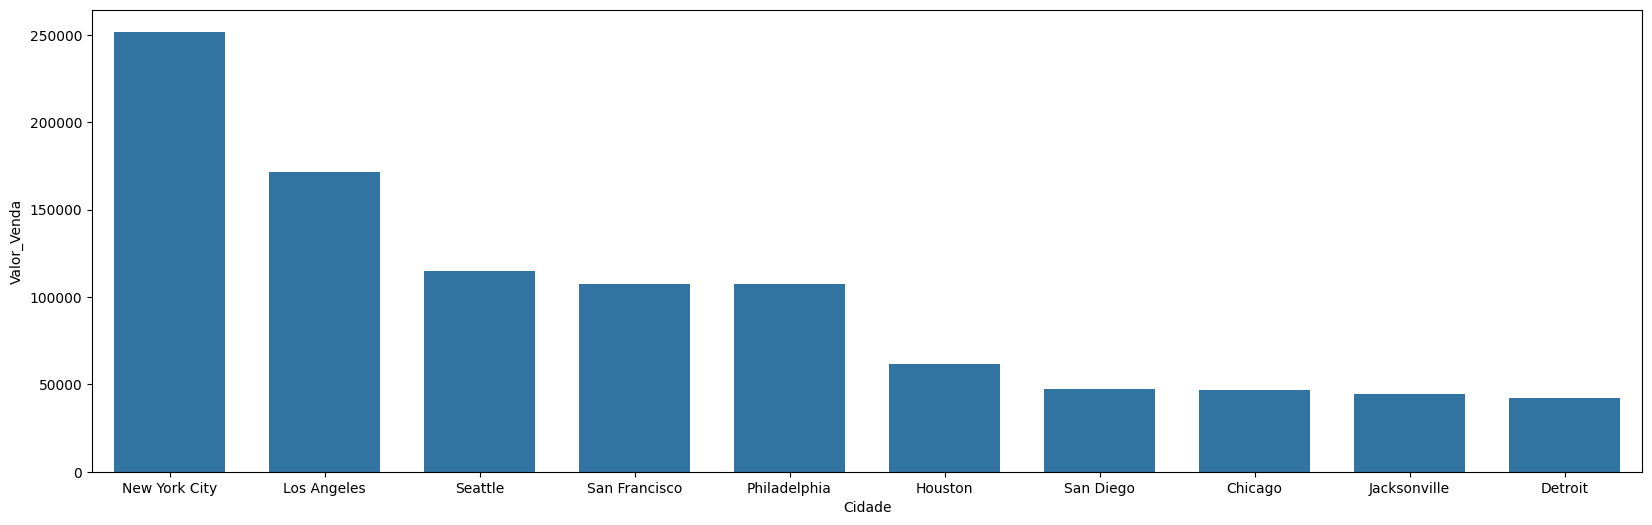

In [771]:
plt.figure(figsize= (20, 6))
sns.barplot(data= df2.head(10), x = 'Cidade', y = 'Valor_Venda', gap = 0.1)
# plt.xticks(rotation = 90)
plt.show()

- Qual Segmento Teve o Maior Total de Vendas? Demonstre o resultado através de um gráfico de pizza.

In [772]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [773]:
df2 = df[['Segmento', 'Valor_Venda']].copy()
df2.head()

,Segmento,Valor_Venda
0,Consumer,261.9600
1,Consumer,731.9400
2,Corporate,14.6200
3,Consumer,957.5775
4,Consumer,22.3680


In [774]:
df3 = df2.groupby(['Segmento']).sum().sort_values('Valor_Venda', ascending= False)
df3

,Valor_Venda
Segmento,
Consumer,1.133834e+06
Corporate,6.792322e+05
Home Office,4.224914e+05


<Axes: ylabel='Valor_Venda'>

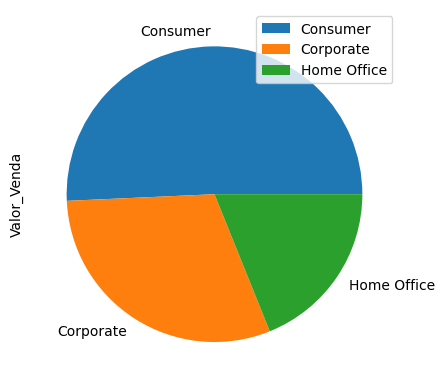

In [775]:
df3.plot.pie(y = 'Valor_Venda')

- Qual o Total de Vendas Por Segmento e Por Ano?

In [776]:
df.head()


,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [777]:
df2 = df[['Segmento', 'Valor_Venda']].copy()
df2.head()

,Segmento,Valor_Venda
0,Consumer,261.9600
1,Consumer,731.9400
2,Corporate,14.6200
3,Consumer,957.5775
4,Consumer,22.3680


In [778]:
df2['Ano'] = df['Data_Pedido'].str.split('/').str[2]
df2.head()

,Segmento,Valor_Venda,Ano
0,Consumer,261.9600,2017
1,Consumer,731.9400,2017
2,Corporate,14.6200,2017
3,Consumer,957.5775,2016
4,Consumer,22.3680,2016


In [779]:
df3 = df2.groupby(['Segmento', 'Ano']).sum()
df3

Valor_Venda
Segmento    Ano              
Consumer    2015  256719.9166
            2016  265295.2593
            2017  288459.5572
            2018  323359.6019
Corporate   2015  125819.5957
            2016  114643.1229
            2017  203266.7398
            2018  235502.7284
Home Office 2015   88229.0878
            2016   74134.1332
            2017  103639.6270
            2018  156488.5849

- Os  gestores  da  empresa  estão  considerando conceder  diferentes  faixas  de  descontos  e gostariam de fazer uma simulação com base na regra abaixo:
    - Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
    - Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

- Quantas Vendas Receberiam 15% de Desconto?

In [780]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [781]:
df2 = df.query('Valor_Venda > 1000')
df2

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
10,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,FUR-TA-10001539,Furniture,Tables,1706.184
24,CA-2016-106320,25/09/2016,EB-13870,Consumer,United States,Orem,Utah,FUR-TA-10000577,Furniture,Tables,1044.630
27,US-2016-150630,17/09/2016,TB-21520,Consumer,United States,Philadelphia,Pennsylvania,FUR-BO-10004834,Furniture,Bookcases,3083.430
35,CA-2017-117590,08/12/2017,GH-14485,Corporate,United States,Richardson,Texas,TEC-PH-10004977,Technology,Phones,1097.544
54,CA-2017-105816,11/12/2017,JM-15265,Corporate,United States,New York City,New York,TEC-PH-10002447,Technology,Phones,1029.950
...,...,...,...,...,...,...,...,...,...,...,...
9632,CA-2015-151330,14/10/2015,TC-21295,Consumer,United States,Everett,Massachusetts,FUR-CH-10000749,Furniture,Chairs,1628.820
9636,CA-2016-116638,28/01/2016,JH-15985,Consumer,United States,Concord,North Carolina,FUR-TA-10000198,Furniture,Tables,4297.644
9646,CA-2017-107104,26/11/2017,MS-17365,Consumer,United States,Los Angeles,California,FUR-BO-10002213,Furniture,Bookcases,3406.664
9657,CA-2017-160717,06/06/2017,ME-17320,Home Office,United States,Santa Barbara,California,TEC-PH-10001459,Technology,Phones,3023.928


In [782]:
df2.count()

ID_Pedido       457
Data_Pedido     457
ID_Cliente      457
Segmento        457
Pais            457
Cidade          457
Estado          457
ID_Produto      457
Categoria       457
SubCategoria    457
Valor_Venda     457
dtype: int64

- Considere  Que  a  Empresa  Decida  Conceder  o  Desconto  de  15%  do  Item  Anterior.  Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [783]:
df.head(15)

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680
5,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,FUR-FU-10001487,Furniture,Furnishings,48.8600
6,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-AR-10002833,Office Supplies,Art,7.2800
7,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,TEC-PH-10002275,Technology,Phones,907.1520
8,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-BI-10003910,Office Supplies,Binders,18.5040
9,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-AP-10002892,Office Supplies,Appliances,114.9000


In [784]:
df2 = df.copy()

In [785]:
df2['Valor_Venda_Desconto'] = df['Valor_Venda'].apply(lambda x: x * (100 - 15) / 100 if x > 1000 else x)
df2.head(15)


,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Valor_Venda_Desconto
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,22.3680
5,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,FUR-FU-10001487,Furniture,Furnishings,48.8600,48.8600
6,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-AR-10002833,Office Supplies,Art,7.2800,7.2800
7,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,TEC-PH-10002275,Technology,Phones,907.1520,907.1520
8,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-BI-10003910,Office Supplies,Binders,18.5040,18.5040
9,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-AP-10002892,Office Supplies,Appliances,114.9000,114.9000


In [786]:
media_venda_sem_desconto = df2['Valor_Venda'].mean()
print(f"Valor médio de vendas sem desconto: {media_venda_sem_desconto}")

Valor médio de vendas sem desconto: 230.4698922371134


In [787]:
media_venda_com_desconto = df2['Valor_Venda_Desconto'].mean()
print(f"Valor médio de vendas com 15% de desconto para vendas maiores de 1000: {media_venda_com_desconto}")

Valor médio de vendas com 15% de desconto para vendas maiores de 1000: 215.51038958350517


- Qual o Média de Vendas Por Segmento, Por Ano e Por Mês? Demonstre o resultado através de gráfico de linha.

In [788]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [789]:
df2 = df[['Segmento', 'Valor_Venda']].copy()
df2.head()

,Segmento,Valor_Venda
0,Consumer,261.9600
1,Consumer,731.9400
2,Corporate,14.6200
3,Consumer,957.5775
4,Consumer,22.3680


In [790]:
df_data_split = df['Data_Pedido'].str.split('/')
df_data_split.head()

0    [08, 11, 2017]
1    [08, 11, 2017]
2    [12, 06, 2017]
3    [11, 10, 2016]
4    [11, 10, 2016]
Name: Data_Pedido, dtype: object

In [791]:
df2['Ano'] = df_data_split.str[2]
df2['Mes'] = df_data_split.str[1]
df2.head()

,Segmento,Valor_Venda,Ano,Mes
0,Consumer,261.9600,2017,11
1,Consumer,731.9400,2017,11
2,Corporate,14.6200,2017,06
3,Consumer,957.5775,2016,10
4,Consumer,22.3680,2016,10


In [792]:
df3 = df2.groupby(['Segmento', 'Ano', 'Mes']).mean().reset_index()
df3

,Segmento,Ano,Mes,Valor_Venda
0,Consumer,2015,01,146.736787
1,Consumer,2015,02,117.327926
2,Consumer,2015,03,152.170564
3,Consumer,2015,04,189.762750
4,Consumer,2015,05,191.337439
...,...,...,...,...
139,Home Office,2018,08,176.160606
140,Home Office,2018,09,249.140597
141,Home Office,2018,10,412.576597
142,Home Office,2018,11,247.519423


In [793]:
df3 = df3.rename(columns={'Ano': 'year', 'Mes': 'month'})
df3['data'] = pd.to_datetime(df3[['year', 'month']].assign(day=1))
df3

,Segmento,year,month,Valor_Venda,data
0,Consumer,2015,01,146.736787,2015-01-01
1,Consumer,2015,02,117.327926,2015-02-01
2,Consumer,2015,03,152.170564,2015-03-01
3,Consumer,2015,04,189.762750,2015-04-01
4,Consumer,2015,05,191.337439,2015-05-01
...,...,...,...,...,...
139,Home Office,2018,08,176.160606,2018-08-01
140,Home Office,2018,09,249.140597,2018-09-01
141,Home Office,2018,10,412.576597,2018-10-01
142,Home Office,2018,11,247.519423,2018-11-01


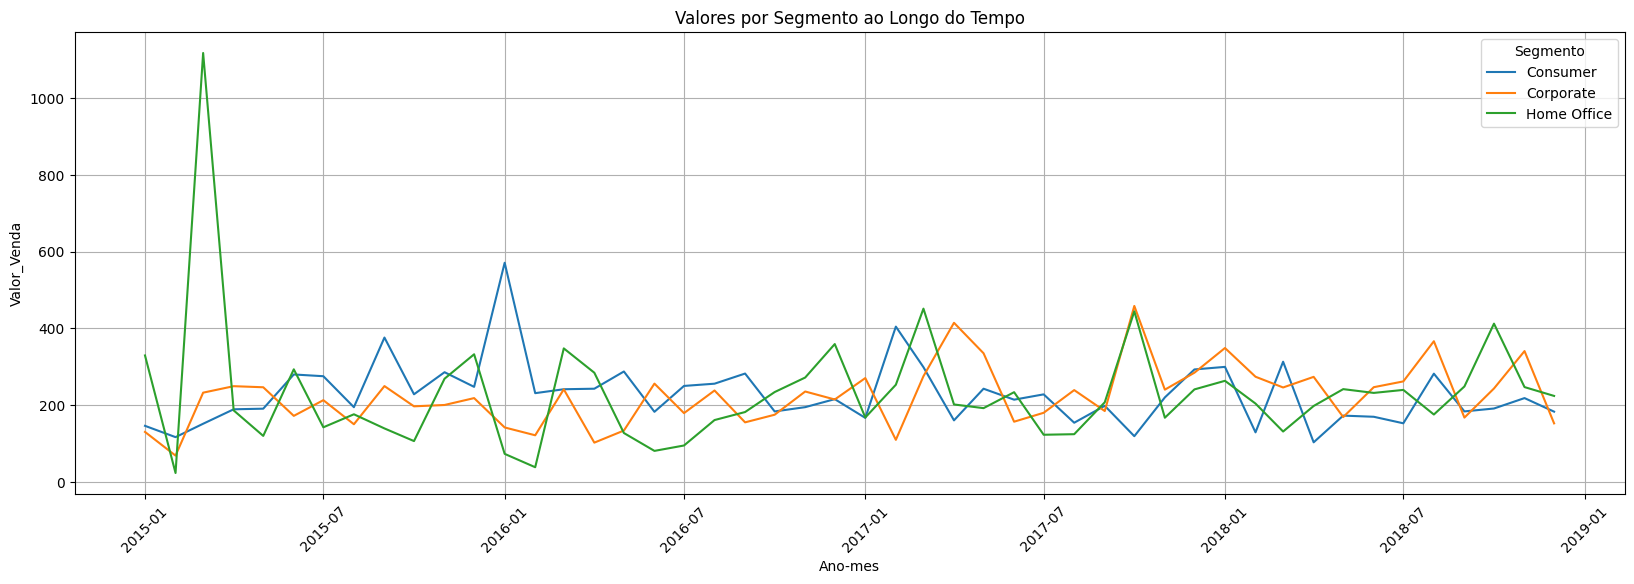

In [794]:
# Plot
fig, ax = plt.subplots(figsize=(20, 6))

# Agrupar os valores por segmento e plotar cada um
for segmento, data in df3.groupby('Segmento'):
    ax.plot(data['data'], data['Valor_Venda'], label=segmento)

# Configurações do gráfico
ax.set_title('Valores por Segmento ao Longo do Tempo')
ax.set_xlabel('Ano-mes')
ax.set_ylabel('Valor_Venda')
plt.legend(title="Segmento")
plt.grid(True)

# Mostrar o gráfico
plt.xticks(rotation=45)
plt.show()

- Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias? Demonstre tudo através de um único gráfico.

In [795]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [796]:
df2 = df[['Categoria', 'SubCategoria', 'Valor_Venda']].groupby(['SubCategoria'])['Valor_Venda'].sum().sort_values(ascending= False).head(12).reset_index()
df2

,SubCategoria,Valor_Venda
0,Phones,325271.2940
1,Chairs,317919.6250
2,Storage,216188.3620
3,Tables,202083.3600
4,Binders,194723.3810
5,Machines,189238.6310
6,Accessories,162791.3620
7,Copiers,146248.0940
8,Bookcases,108045.0467
9,Appliances,104061.6930


In [797]:
sub_top12 = df2.SubCategoria.values
sub_top12

array(['Phones', 'Chairs', 'Storage', 'Tables', 'Binders', 'Machines',
       'Accessories', 'Copiers', 'Bookcases', 'Appliances', 'Furnishings',
       'Paper'], dtype=object)

In [798]:
df3 = df[['Categoria', 'SubCategoria', 'Valor_Venda']].copy()
df3

,Categoria,SubCategoria,Valor_Venda
0,Furniture,Bookcases,261.9600
1,Furniture,Chairs,731.9400
2,Office Supplies,Labels,14.6200
3,Furniture,Tables,957.5775
4,Office Supplies,Storage,22.3680
...,...,...,...
9695,Office Supplies,Paper,22.8300
9696,Office Supplies,Appliances,54.3200
9697,Technology,Phones,196.7760
9698,Office Supplies,Fasteners,3.6200


In [799]:
df4 = df3.loc[df3['SubCategoria'].isin(sub_top12)]
df4


,Categoria,SubCategoria,Valor_Venda
0,Furniture,Bookcases,261.9600
1,Furniture,Chairs,731.9400
3,Furniture,Tables,957.5775
4,Office Supplies,Storage,22.3680
5,Furniture,Furnishings,48.8600
...,...,...,...
9694,Furniture,Furnishings,30.3360
9695,Office Supplies,Paper,22.8300
9696,Office Supplies,Appliances,54.3200
9697,Technology,Phones,196.7760


In [802]:
df4.groupby(['Categoria', 'SubCategoria']).sum()

Valor_Venda
Categoria       SubCategoria             
Furniture       Bookcases     108045.0467
                Chairs        317919.6250
                Furnishings    88862.7700
                Tables        202083.3600
Office Supplies Appliances    104061.6930
                Binders       194723.3810
                Paper          76312.7640
                Storage       216188.3620
Technology      Accessories   162791.3620
                Copiers       146248.0940
                Machines      189238.6310
                Phones        325271.2940

In [800]:
df5 = df4.groupby(['Categoria', 'SubCategoria']).sum().reset_index()
df5

,Categoria,SubCategoria,Valor_Venda
0,Furniture,Bookcases,108045.0467
1,Furniture,Chairs,317919.6250
2,Furniture,Furnishings,88862.7700
3,Furniture,Tables,202083.3600
4,Office Supplies,Appliances,104061.6930
5,Office Supplies,Binders,194723.3810
6,Office Supplies,Paper,76312.7640
7,Office Supplies,Storage,216188.3620
8,Technology,Accessories,162791.3620
9,Technology,Copiers,146248.0940


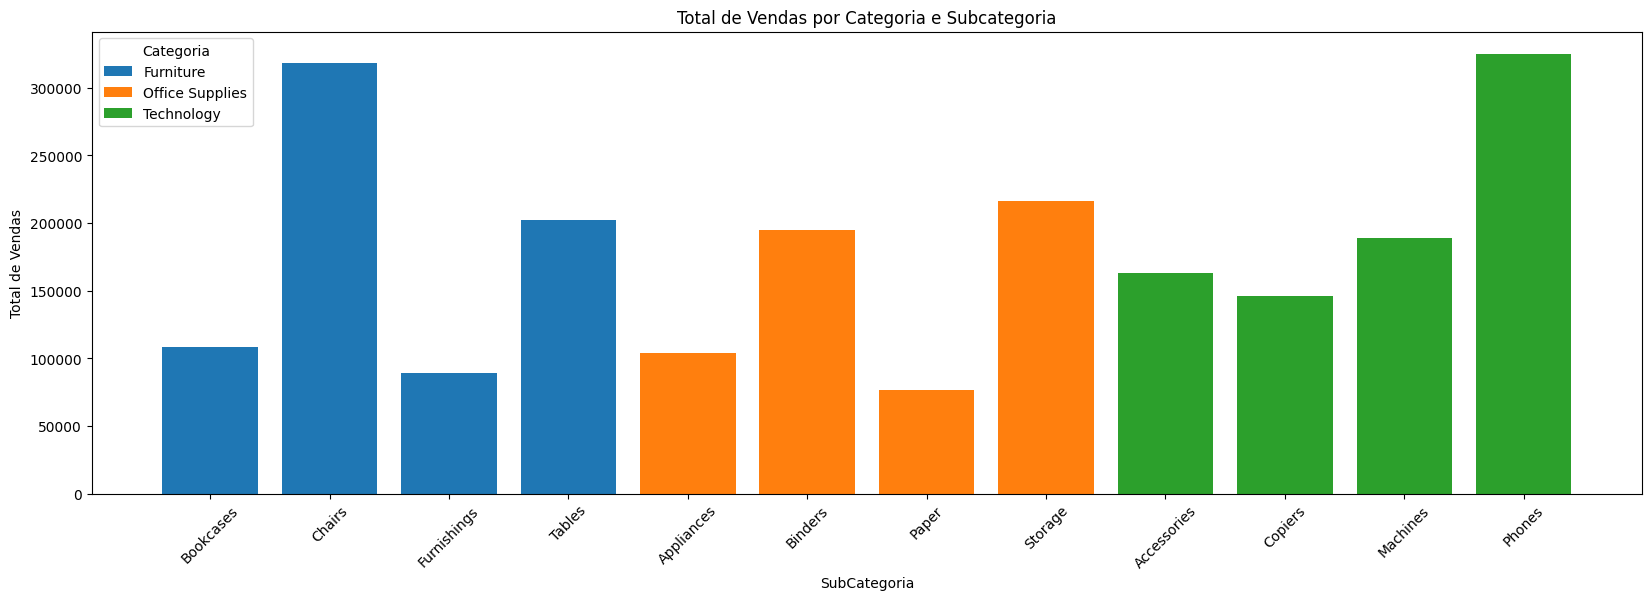

In [801]:

fig, ax = plt.subplots(figsize=(20, 6))

for categoria in df5['Categoria'].unique():
    sub_df = df5[df5['Categoria'] == categoria]
    plt.bar(sub_df['SubCategoria'], sub_df['Valor_Venda'], label=categoria)

ax.set_title('Total de Vendas por Categoria e Subcategoria')
ax.set_xlabel('SubCategoria')
ax.set_ylabel('Total de Vendas')
plt.legend(title="Categoria")
# plt.grid(True)

plt.xticks(rotation=45)
plt.show()